In [1]:
import pandas as pd
import seaborn as sns
import glob
import os

In [2]:
output_files = glob.glob(os.path.expanduser('~/Desktop/output') + "/*.txt")

In [3]:
results = pd.DataFrame()
for file in output_files:
    with open(file, 'rt') as fd:
        string = fd.readline().replace('\n','').split(': ')
        temp = pd.DataFrame({string[i]: string[i + 1] for i in range(0, len(string), 2)}, index=[0])
        
        results = pd.concat([results, temp], ignore_index=True)
    
results.columns

Index(['assembler', 'reads', 'threads', 'timed', 'User time (seconds)',
       'System time (seconds)', 'Percent of CPU this job got',
       'Elapsed (wall clock) time (h:mm:ss or m:ss)',
       'Average shared text size (kbytes)',
       'Average unshared data size (kbytes)', 'Average stack size (kbytes)',
       'Average total size (kbytes)', 'Maximum resident set size (kbytes)',
       'Average resident set size (kbytes)',
       'Major (requiring I/O) page faults',
       'Minor (reclaiming a frame) page faults', 'Voluntary context switches',
       'Involuntary context switches', 'Swaps', 'File system inputs',
       'File system outputs', 'Socket messages sent',
       'Socket messages received', 'Signals delivered', 'Page size (bytes)',
       'Exit status'],
      dtype='object')

In [4]:
def get_mins(time_str):
    if time_str.count(":")==2:
        """Get Seconds from time."""
        h, m, s = time_str.split(':')
        total_time = (int(h) * 3600 + int(m) * 60 + float(s))/60
    elif time_str.count(":")==1:
        """Get Seconds from time."""
        m, s = time_str.split(':')
        total_time = (int(m) * 60 + float(s))/60
        
    return total_time

results['time (minutes)'] = results['Elapsed (wall clock) time (h:mm:ss or m:ss)'].apply(get_mins)

In [5]:
results['Percent of CPU this job got'] = results['Percent of CPU this job got'].str.replace('%','')

cols = ['reads', 'threads', 'Percent of CPU this job got']
results[cols] = results[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#results['threads'] = pd.to_numeric(results['threads'])

In [6]:
results['threads']

0      12
1      16
2       1
3       2
4      32
       ..
134    24
135     2
136    32
137     4
138     8
Name: threads, Length: 139, dtype: int64

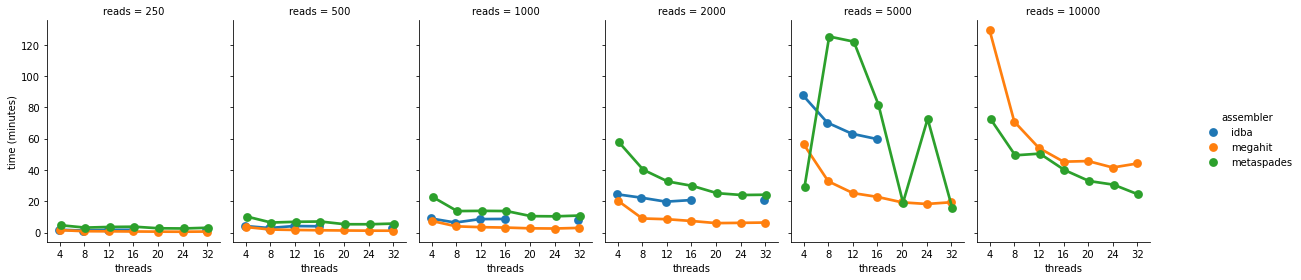

In [11]:
sns.catplot(x="threads", y="time (minutes)", hue="assembler", col="reads", data=results[results.threads>2], kind="point", dodge=True, height=4, aspect=.7, margin_titles=True)

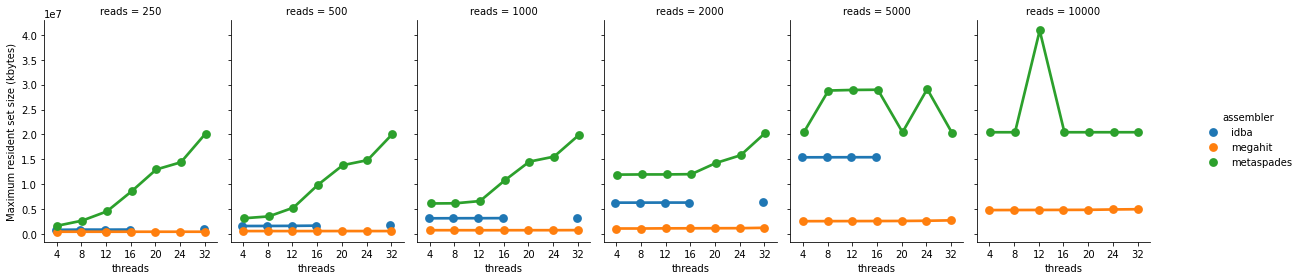

In [12]:
sns.catplot(x="threads", y="Maximum resident set size (kbytes)", hue="assembler", col="reads", data=results[results.threads>2], kind="point", dodge=True, height=4, aspect=.7, margin_titles=True)

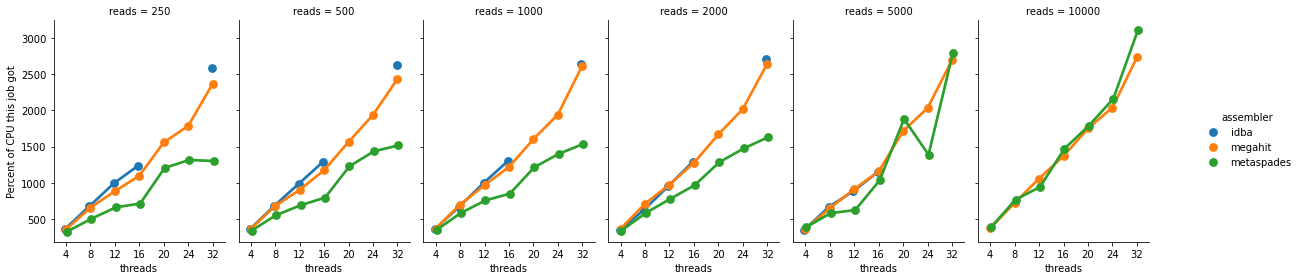

In [13]:
sns.catplot(x="threads", y="Percent of CPU this job got", hue="assembler", col="reads", data=results[results.threads>2], kind="point", dodge=True, height=4, aspect=.7, margin_titles=True)